# Lecture 2 Worksheet

## Recap

In the first lecture, we:
    
- Installed Dash and its dependencies
- Wrote our first Dash app
- Used some of the Dash HTML components (H1, H3, Img, Iframe)
- Explored "hot reloading" (app changes happen live)
- Used VSCode to write and execute code
- After class, I will commit my class app [here](https://github.com/firasm/dash_demo/tree/master/python/Class%20App)
    - Last version of app1.py is below:
    - Feel free to use your own or this version

**app1.py:**

```
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = dash.Dash(__name__, assets_folder='assets')
server = app.server

app.title = 'Dash app with pure Altair HTML'

app.layout = html.Div([

    ### ADD CONTENT HERE like: html.H1('text'),
    html.H1('This is my first dashboard'),
    html.H2('This is a subtitle'),

    html.H3('Here is an image'),
    html.Img(src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Unico_Anello.png/1920px-Unico_Anello.png', 
            width='10%'),
    html.H3('Here is our first plot:'),
    html.Iframe(
        sandbox='allow-scripts',
        id='plot',
        height='450',
        width='625',
        style={'border-width': '0'},
        ################ The magic happens here
        srcDoc=open('chart.html').read()
        ################ The magic happens here
        ),
])

if __name__ == '__main__':
    app.run_server(debug=True)
```

## Today's Agenda

- Part 1: Dash Core Components (15 mins)
- Part 2: Create Altair figures directly in the dash app (10 mins)
- Break (5 mins)
- Part 3: How to do use core components to do stuff
    - Function decorators in python (5 mins)
    - Callbacks in Dash (20 mins)
- Time to work on projects (20 mins)

### Deferred to next week:

- What makes for an effective Dashboard?

In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc

import altair as alt
import vega_datasets

## Part 1: Dash Core Components

**IMPORTANT**: In your participation repo, duplicate app1.py and rename the copied file as app2.py.

### Dash and Markdown
Rather than writing and styling your text using pure html, dash actually supports Markdown syntax as well.
To use markdown in Dash, simply add a new component to the list components (e.g., `html.Iframe` or `html.H3`):

```
dcc.Markdown('''
            
## Add markdown text here (copy this entire cell and paste it in your app
'''

```

In fact, I would recommend you use Markdown as it's more **readable** and *easier* to use with git.

Unordered List syntax works out of the box:
- List 1
- List 2
- List 3

as well as an ordered list:
1. One
1. Two
1. Three

### Do images work well in a Dash Markdown component?

Yes, but just like in regular markdown, you cannot control img sizes, need HTML for that.
Probably better to use the Dash `html.Img()` component (see above).
You can add the image as-is by turning removing the triple ticks from the code line below:

```![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Unico_Anello.png/1920px-Unico_Anello.png)```

## More Dash Core Components

So far we have used just a few of the Dash components: 
`html.H1`, `html.Img`, `html.P`, and `dcc.Markdown`.
There are many other, much more useful components.
A full list of the core components is [here](https://dash.plot.ly/dash-core-components) and the exhaustive list of html components can be found [here](https://dash.plot.ly/dash-html-components).

Let's start by adding a few of these components.
Note that the components won't really do very much at the moment, but we will soon learn how to use these components to control our plots and dashboard (callbacks).
It requires setting up a Dash `callback`.
If you're curious, you can see how it works [here](https://dash.plot.ly/dash-core-components).

![](https://media1.tenor.com/images/99a1288a3057dc8e9ff7ebf5d46baee3/tenor.gif?itemid=15254127)
![](https://media1.tenor.com/images/f708e56b6ab99de21228c95203c7af8e/tenor.gif?itemid=13942585)

Gif sources: [1](https://tenor.com/view/yoda-patience-you-must-have-patience-gif-15254127) and [2](https://tenor.com/view/teach-you-yoda-star-wars-mentor-teach-you-iwill-gif-13942585)

### Dropdowns

To add a dropdown, in the app.layout, and inside the list of components in `html.Div`, you can add this code:

```
dcc.Dropdown(
    options=[
        {'label': 'New York City', 'value': 'NYC'},
        {'label': 'Montréal', 'value': 'MTL'},
        {'label': 'San Francisco', 'value': 'SF'}
    ],
    value='MTL'
)  
```

The `options` parameter takes in a list of dictionaries with `label` and `value`. 
The `label` is what is shown to the user in the dashboard, and the `value` is the shortform.
The default value can be set by passing in the `value` parameter to `dcc.Dropdown()`.

### Slider

Slider bars are easy too:
```
dcc.Slider(
    min=0,
    max=9,
    marks={i: 'Label {}'.format(i) for i in range(10)},
    value=5,
)  
```

You should recognize the dictionary comprehension syntax being passed to `marks`.
If you don't remember what it does, try print out in `{i: 'Label {}'.format(i) for i in range(10)}` in a jupyterlab cell. 
More details about dictionary comprehensions are [here](https://realpython.com/iterate-through-dictionary-python/).

### Tabs - an essential dash core component (dcc)!

You can add tabs to your dashboard in a similar way:
```
### Add Tabs to the top of the page
dcc.Tabs(id='tabs', value='tab1', children=[
    dcc.Tab(label='Lecture 1', value='tab-1'),
    dcc.Tab(label='Lecture 2', value='tab-2'),
    dcc.Tab(label='Lecture 3', value='tab-3'), 
    dcc.Tab(label='Lecture 4', value='tab-4'), 
]),  
```
We STILL how to control what gets shown when you click the different tabs.

Coming up, I promise...we just need to learn two more things!



## Part 2: Create Altair figures directly in the Dash app

Last class I showed you how to create an Altair plot in jupyterlab, export it to an html file and then load it in a Dash Iframe.
Though this will work, it's kind of a pain to do.

Let me show you an easier way.

### Step 1: Set a theme for your Altair charts

In [2]:
def mds_special():
    font = "Arial"
    axisColor = "#000000"
    gridColor = "#DEDDDD"
    return {
        "config": {
            "title": {
                "fontSize": 24,
                "font": font,
                "anchor": "start", # equivalent of left-aligned.
                "fontColor": "#000000"
            },
            'view': {
                "height": 300, 
                "width": 400
            },
            "axisX": {
                "domain": True,
                #"domainColor": axisColor,
                "gridColor": gridColor,
                "domainWidth": 1,
                "grid": False,
                "labelFont": font,
                "labelFontSize": 12,
                "labelAngle": 0, 
                "tickColor": axisColor,
                "tickSize": 5, # default, including it just to show you can change it
                "titleFont": font,
                "titleFontSize": 16,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "X Axis Title (units)", 
            },
            "axisY": {
                "domain": False,
                "grid": True,
                "gridColor": gridColor,
                "gridWidth": 1,
                "labelFont": font,
                "labelFontSize": 14,
                "labelAngle": 0, 
                #"ticks": False, # even if you don't have a "domain" you need to turn these off.
                "titleFont": font,
                "titleFontSize": 16,
                "titlePadding": 10, # guessing, not specified in styleguide
                "title": "Y Axis Title (units)", 
                # titles are by default vertical left of axis so we need to hack this 
                #"titleAngle": 0, # horizontal
                #"titleY": -10, # move it up
                #"titleX": 18, # move it to the right so it aligns with the labels 
            },
        }
            }

# register the custom theme under a chosen name
alt.themes.register('mds_special', mds_special)

# enable the newly registered theme
alt.themes.enable('mds_special')
#alt.themes.enable('none') # to return to default

ThemeRegistry.enable('mds_special')

### Step 2: Wrap the code to generate the plot in a function

In [3]:
def make_plot():

    # Create a plot of the Displacement and the Horsepower of the cars dataset

    chart = alt.Chart(vega_datasets.data.cars.url).mark_point(size=90).encode(
                alt.X('Displacement:Q', title = 'Displacement (mm)'),
                alt.Y('Horsepower:Q', title = 'Horsepower (h.p.)'),
                tooltip = ['Horsepower:Q', 'Displacement:Q']
            ).properties(title='Horsepower vs. Displacement',
                        width=500, height=350).interactive()

    return chart

### Step 3: Now let's call the function to see if it works

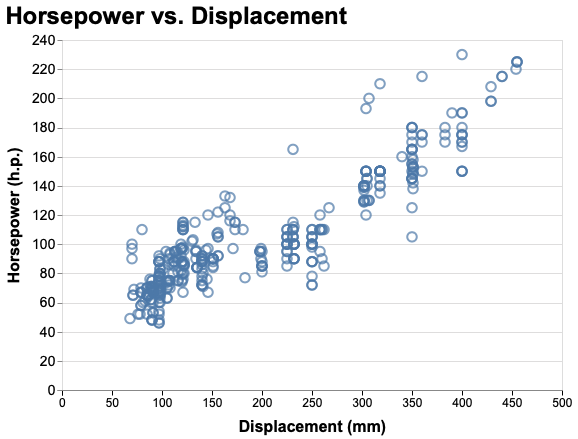

In [4]:
make_plot()

### Step 4: Include theme in function definition

You will also need to include the theme in the function you created so that your plot is styled correctly

### Step 5: pass the function to `srcDoc` in the IFrame

```
srcDoc = make_plot().to_hmtl()
```

**VOILA!**

## Part 3: Python Function Decorators (& Dash Callbacks)

`RealPython.com` has a really excellent [tutorial](https://realpython.com/primer-on-python-decorators/#syntactic-sugar) on decorators.
We will take some examples from there to help explain what decorators do

In [5]:
#These functions are from RealPython - section on Simple Decorators.

def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

def say_whee():
    print("Whee!")

say_whee = my_decorator(say_whee)

What will be the output of `say_whee` if we run it in a cell?

In [6]:
### Your answer here

RealPython.com suggests a definition of decorators:
> "Put simply: decorators wrap a function, modifying its behavior."
> 

#### Introducing, Synctactic Sugar for python

In [14]:
### Example 1B - The example below produces the same plot as the one above!

def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
def say_whee():
    print("Whee!")

In [15]:
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [9]:
### Example 2 of using a decorators:

from datetime import datetime

def not_during_the_night(func):
    def wrapper():
        if 7 <= datetime.now().hour < 22:
            func()
        else:
            pass  # Hush, the neighbors are asleep
    return wrapper

def say_whee():
    print("Whee!")

say_whee = not_during_the_night(say_whee)

What will be the output of `say_whee` now if we run it in a cell?

In [16]:
### Your Answer here

### Let's add a dropdown to our app and just have it display what we selected

You will need two code chunks, it's up to you to figure out where to put them, but here's what the final image should look like:
    
![](dash_dropdown.png)

#### Chunk 1

```
dcc.Dropdown(
    id='demo-dropdown',
    options=[
        {'label': 'New York City', 'value': 'NYC'},
        {'label': 'Montreal', 'value': 'MTL'},
        {'label': 'San Francisco', 'value': 'SF'}
    ],
    value='NYC',
    style=dict(width='45%',
          verticalAlign="middle"
          )
    ),
html.Div(id='dd-output')
```

#### Chunk 2

```
@app.callback(
    dash.dependencies.Output('dd-output', 'children'),
    [dash.dependencies.Input('demo-dropdown', 'value')])
def update_output(value):
    return 'You have selected {}'.format(value)
```

### Commit your  app2.py to the participation repo! See you next Week!

## (Challenge) Modify your app so a dropdown changes the X-axis of your cars plot

Things to help you:

- Hint 1: modify the function to take in a parameter for the x-axis name
- Hint 2: add a new function called `update_plot()`
- Hint 3: Setup a callback with the `plot` id and the id of the new dropdown you create
- The docs [here](https://dash.plot.ly/dash-core-components/dropdown) and [here](https://dash.plot.ly/getting-started-part-2) might help you
- [Here](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types) is how to specify encodings in Altair without using shorthand codes (:Q, :T, :O, etc...)